### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
#data = pd.read_csv('data/coupons.csv')
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PracticalApplication-1/data/coupons.csv')


In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
# Function to identify missing data summary
def missing_data_summary(df):
    # 1. Investigate missing values and data types
    missing_counts = df.isnull().sum()
    data_types = df.dtypes
    print('Total rows of missing_values', len(missing_counts))

    # 2. Percentage of missing data
    missing_percent = (missing_counts / len(df)) * 100

    # 3. Combine both into one DataFrame for better readability
    missing_summary = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing %': missing_percent.round(2),
        "Data Type": data_types
    }).sort_values(by='Missing %', ascending=False)
    return missing_summary

missing_summary = missing_data_summary(data)
display(missing_summary)

# Observations
# - Missing counts:
# 	- car ≈ 99 % missing (only 108 non‑null). Car is effectively unusable; the five “frequency” columns have small, but non‑negligible, gaps.
# 	- Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50 each missing 0.8 – 1.7 %
# - Data types:
# 	- All “frequency” columns are object rather than ordered‑categorical; numeric distance flags are int; temperature is int
# 	- Frequency columns will need cleaning/encoding if we model later.
# - Duplicates
# 	- 73 exact duplicate rows detected (all False in isnull matrix)
# 	- Retaining duplicates could bias counts; safest to drop them.
# - Anomalous strings
# 	- Values such as "never", "nan", and leading/trailing spaces in categorical variables
# 	- Require standardisation (e.g., strip, lower‑case, unify categories).

Total rows of missing_values 26


,Missing Count,Missing %,Data Type
car,12576,99.15,object
CoffeeHouse,217,1.71,object
Restaurant20To50,189,1.49,object
CarryAway,151,1.19,object
RestaurantLessThan20,130,1.02,object
Bar,107,0.84,object
weather,0,0.00,object
temperature,0,0.00,int64
destination,0,0.00,object
passanger,0,0.00,object




```
# This is formatted as code
```

3. Decide what to do about your missing data -- drop, replace, other...

In [ ]:
def clean_coupon_data(df, drop_threshold=90):
    """
    Cleans the coupon dataset.
    Returns a cleaned DataFrame.
    """

    # Make a copy
    df_cleaned = df.copy()

    # -------------------------------
    # Step 1: Drop columns with too many missing values
    missing_percent = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100
    cols_to_drop = missing_percent[missing_percent > drop_threshold].index
    df_cleaned.drop(columns=cols_to_drop, inplace=True)
    print(f"Dropped columns with >{drop_threshold}% missing: {list(cols_to_drop)}")

    # -------------------------------
    # Step 2: Drop rows with missing critical values
    critical_columns = ['Bar', 'CoffeeHouse', 'CarryAway']
    df_cleaned.dropna(subset=critical_columns, inplace=True)
    print(f"Dropped rows with missing values in: {critical_columns}")

    # -------------------------------
    # Step 3: Fill categorical columns with mode (safe version – no chained assignment)
    for col in ['RestaurantLessThan20', 'Restaurant20To50']:
        if df_cleaned[col].isnull().sum():
            mode_val = df_cleaned[col].mode()[0]
            df_cleaned[col] = df_cleaned[col].fillna(mode_val)   # <- no inplace=True
            print(f"Filled missing values in '{col}' with mode ({mode_val}).")

    # -------------------------------
    # Step 4: Normalize text (optional but useful)
    if 'gender' in df_cleaned.columns:
        df_cleaned['gender'] = df_cleaned['gender'].str.strip().str.lower()

    # -------------------------------
    # Step 5: Remove duplicate rows
    duplicate_count = df_cleaned.duplicated().sum()
    df_cleaned.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_count} duplicate rows.")

    # -------------------------------
    # Final summary
    print(f"Final shape of cleaned data: {df_cleaned.shape}")
    return df_cleaned


print(f'Shape before cleaning: {len(data)}')
cleaned_data = clean_coupon_data(data)
# Confirm they're gone
print(f'Shape after cleaning: {len(cleaned_data)}')

# Observations:
# - Created a working copy (cleaned_data = data.copy())
# 	- Preserve the raw dataset for reproducibility and debugging.
# - Dropped the car column
# 	- More than 99 % missing – not recoverable and likely not informative.
# - Dropped rows missing any of Bar, CoffeeHouse, CarryAway
# 	- These three categorical “lifestyle” features are important predictors; their missingness was small (~1 %) so row‑wise deletion has - minimal impact.
# - Imputed remaining categorical gaps (RestaurantLessThan20, Restaurant20To50) with column mode
# 	- Low missing percentage; mode preserves the existing distribution and is appropriate for unordered categories.
# - String normalisation (gender = gender.str.strip().str.lower())
# 	- Removes accidental spaces / capitalisation differences that would create spurious levels.
# - Removed exact duplicate rows (cleaned_data.drop_duplicates(inplace=True))
# 	- Prevents double‑counting in EDA and model training.
# - Verified result (missing_data_summary(cleaned_data))
# 	- Confirmed zero missing values in retained columns and 12 637 rows (loss: 47 rows from drops + duplicates).


Shape before cleaning: 12684
Dropped columns with >90% missing: ['car']
Dropped rows with missing values in: ['Bar', 'CoffeeHouse', 'CarryAway']
Filled missing values in 'RestaurantLessThan20' with mode (1~3).
Filled missing values in 'Restaurant20To50' with mode (less1).
Removed 73 duplicate rows.
Final shape of cleaned data: (12220, 25)
Shape after cleaning: 12220


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Considering mean value for this from cleaned data
prop_accept = cleaned_data['Y'].mean()      # mean of a 0/1 column = proportion of 1’s
print(f"Proportion accepting the coupon: {prop_accept:.3f}")

Proportion accepting the coupon: 0.569


5. Use a bar plot to visualize the `coupon` column.

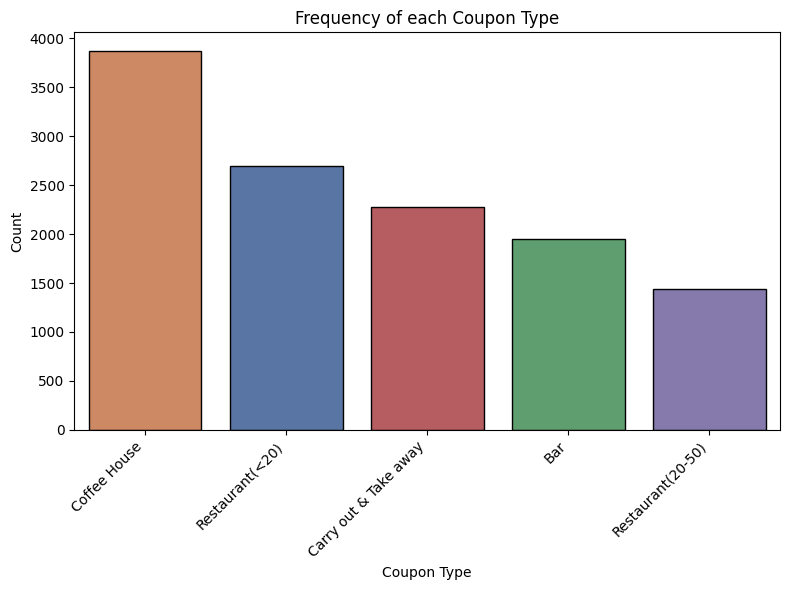

In [ ]:
plt.figure(figsize=(8,6))
# Sort bars by frequency (most‑common coupon on the left)
coupon_order = cleaned_data['coupon'].value_counts().index

sns.countplot(
    data = cleaned_data,
    x='coupon',
    hue='coupon',
    order = coupon_order,
    palette = 'deep',
    edgecolor = 'black',
    linewidth = 1
)


plt.title('Frequency of each Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

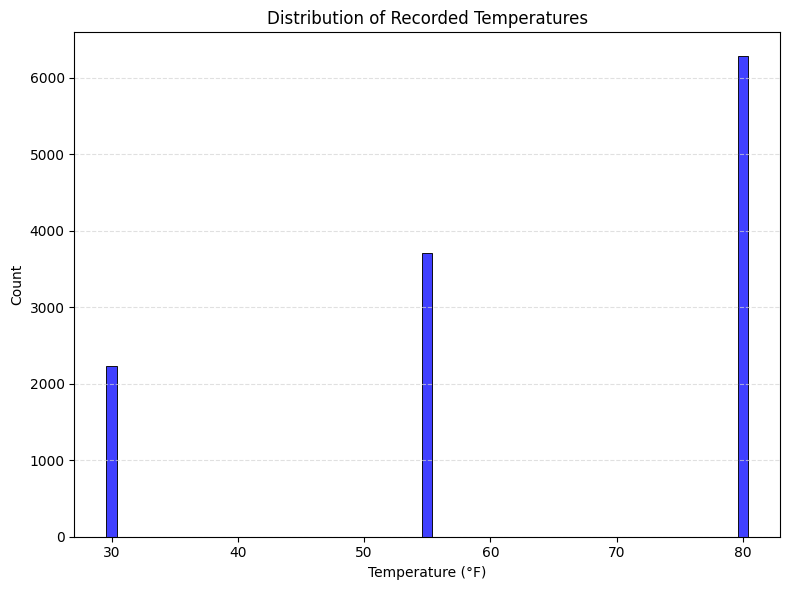

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=cleaned_data,
    x='temperature',
    discrete=True,
    shrink=0.8,
    color='blue'
)

plt.title('Distribution of Recorded Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Count')
plt.grid(axis='y', color='lightgrey', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:

df_bar_coupons = cleaned_data[cleaned_data['coupon'] == 'Bar'].copy()

2. What proportion of bar coupons were accepted?


In [107]:

# Count accepted (Y=1) and total bar coupons. And We can also use mean() for this.
bar_coupons_accepted_count = df_bar_coupons[df_bar_coupons['Y'] == 1].shape[0]
bar_coupons_total_count = df_bar_coupons.shape[0]
bar_coupons_acceptance_rate = bar_coupons_accepted_count / bar_coupons_total_count

print(f"Proportion accepting the coupon: {bar_coupons_acceptance_rate:.3f}")

Proportion accepting the coupon: 0.410


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

> Add blockquote




In [136]:

# Mapping Bar categories to Numeric
print(cleaned_data['Bar'].unique())
bar_mapping = {
    'never': 0,
    'less1': 0,
    '1~3': 3,
    '4~8': 8,
    'gt8': 9
}
# Step 1: Map the categorical to numeric
df_bar_coupons['bar_visits'] = df_bar_coupons['Bar'].map(bar_mapping)
#cleaned_data['Bar_num'] = cleaned_data['Bar'].map(bar_mapping)

# Step 2: Create frequency categories
#df_bar_coupons['bar_freq'] = df_bar_coupons['bar_visits'].apply(lambda x: '≤3' if x <= 3 else '>3')

# Step 3: Group by category and calculate acceptance rate
#bar_coupons_acceptance_by_freq = df_bar_coupons.groupby('bar_freq')['Y'].mean()

# Define bar visit frequency categories
low_freq = ['never', 'less1', '1~3']
high_freq = ['4~8', 'gt8']

# Filter the cleaned bar coupon DataFrame
df_bar_low = df_bar_coupons[df_bar_coupons['Bar'].isin(low_freq)]
df_bar_high = df_bar_coupons[df_bar_coupons['Bar'].isin(high_freq)]

# Calculate acceptance rates
low_acceptance_rate = df_bar_low['Y'].mean()
high_acceptance_rate = df_bar_high['Y'].mean()

# Print comparison
print(f"Acceptance Rate (≤3 bar visits/month):  {low_acceptance_rate:.2f}")
print(f"Acceptance Rate (>3 bar visits/month):  {high_acceptance_rate:.2f}")



['never' 'less1' '1~3' 'gt8' '4~8']
Acceptance Rate (≤3 bar visits/month):  0.37
Acceptance Rate (>3 bar visits/month):  0.76


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [137]:
print(df_bar_coupons['age'].unique())
# Define a function to check if age group is over 25
def is_over_25(age_str):
    return age_str not in ['below21', '21', '21-25']

df_bar_coupons['over_25'] = df_bar_coupons['age'].apply(is_over_25)
# Group A: goes to bar more than once a month and over 25
group_a = df_bar_coupons[(df_bar_coupons['bar_visits'] > 1) & (df_bar_coupons['over_25'] == True)]

# Group B: all others
group_b = df_bar_coupons[ ~ ((df_bar_coupons['bar_visits'] > 1) & (df_bar_coupons['over_25'] == True)) ]

accept_rate_a = group_a['Y'].mean()
accept_rate_b = group_b['Y'].mean()

print(f"Acceptance rate (Group A - over 25 & bar > 1/month): {accept_rate_a:.3f}")
print(f"Acceptance rate (Group B - all others): {accept_rate_b:.3f}")

['21' '46' '26' '31' '41' '50plus' '36' 'below21']
Acceptance rate (Group A - over 25 & bar > 1/month): 0.693
Acceptance rate (Group B - all others): 0.335


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [138]:
# list of occupations to exclude
exclude_occs = ['farming', 'fishing', 'forestry']

# subgroup mask
subgroup_1 = (
    (df_bar_coupons['bar_visits'] > 1) &
    (df_bar_coupons['passanger'] != 'Kid(s)') &
    (~df_bar_coupons['occupation'].str.lower().isin(exclude_occs)) # finds any and ignores
)

df_sub = df_bar_coupons[subgroup_1]
df_rest = df_bar_coupons[~subgroup_1]

rate_sub  = df_sub['Y'].mean()
rate_rest = df_rest['Y'].mean()

print(f"Acceptance rate (>1 bar visits, no kids, non-FFF occ): {rate_sub:.3f}")
print(f"Acceptance rate (everyone else):                {rate_rest:.3f}")


Acceptance rate (>1 bar visits, no kids, non-FFF occ): 0.708
Acceptance rate (everyone else):                0.296


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [144]:

print(df_bar_coupons['maritalStatus'].unique())
print(df_bar_coupons['income'].unique())
print(df_bar_coupons['age'].unique())
print(cleaned_data['RestaurantLessThan20'].unique())

under30_age_values = ['below21', '21', '26']
cheapeats_4plus_values = ['4~8', 'gt8'] # Do not include 'never', 'less1', '1~3'
income_under_50k_values = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']

# 1) “drivers who go to bars > once/month”
#    AND have passenger != “Kid(s)”
#    AND occupation not in Farming/Fishing/Forestry
group1 = df_bar_coupons[
    (df_bar_coupons['bar_visits'] > 1) &
    (df_bar_coupons['passanger'] != 'Kid(s)') &
    (df_bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]

# 2) “drivers who go to bars > once/month”
#    AND age is under 30 (per your age bins)
group2 = df_bar_coupons[
    (df_bar_coupons['bar_visits'] > 1) &
    (df_bar_coupons['age'].isin(under30_age_values))
]

# 3) “drivers who go to cheap restaurants >4 times/month”
#    AND income < 50K
# Note: Per the Question, I assume the cheapeats should be calculate from original CLEANED_data DF instead of using cleaned Bar coupons DF
group3 = cleaned_data[
    (cleaned_data['RestaurantLessThan20'].isin(cheapeats_4plus_values)) &
    (cleaned_data['income'].isin(income_under_50k_values))
]

print(f"Acceptance Rate: (Bar visits >1, passenger not a kid, not widowed): {group1['Y'].mean().round(3)}")
print(f"Acceptance Rate: (Bar visits >1, age under 30): {group2['Y'].mean().round(3)}")
print(f"Acceptance Rate: (Cheap restaurant visits >4, income < $50K): {group3['Y'].mean().round(3)}")


['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
['$62500 - $74999' '$12500 - $24999' '$75000 - $87499' '$50000 - $62499'
 '$37500 - $49999' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
['4~8' '1~3' 'less1' 'gt8' 'never']
Acceptance Rate: (Bar visits >1, passenger not a kid, not widowed): 0.708
Acceptance Rate: (Bar visits >1, age under 30): 0.717
Acceptance Rate: (Cheap restaurant visits >4, income < $50K): 0.602


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [143]:
# - People who visit bars more than once a month are more likely to accept bar coupons.
# - Younger drivers (under 30 years old) tend to accept coupons more than older drivers.
# - Drivers who don’t have kids in the car are more open to accepting bar coupons.
# - Widowed drivers are less likely to accept coupons compared to others.
# - If a person goes to inexpensive restaurants often and earns less than $50,000, they are more likely to accept coupons they value savings.
# - Occupation: people in non-physical or social jobs are more likely to accept bar coupons than those in jobs like farming or fishing.

cleaned_data

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


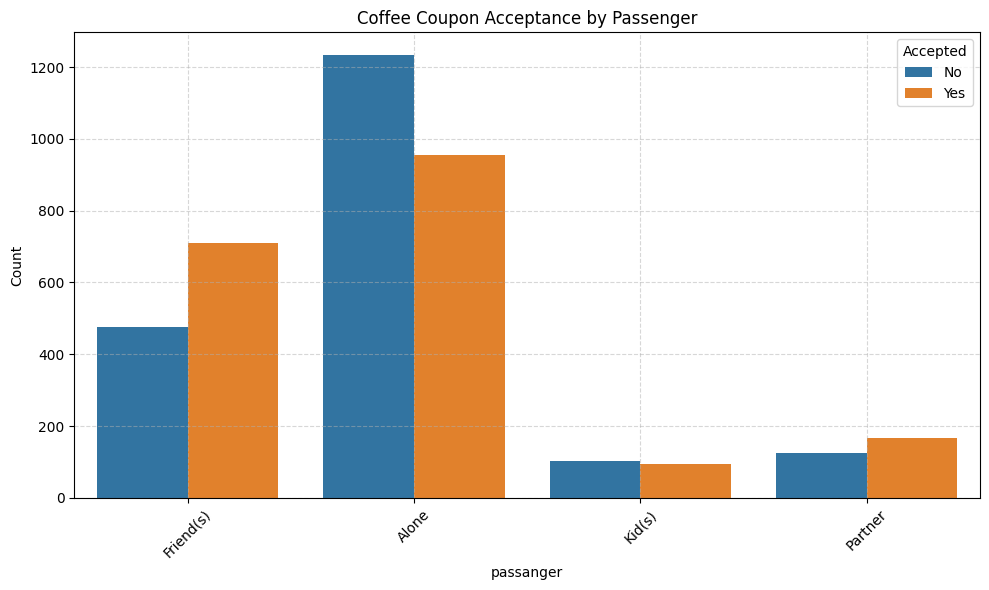

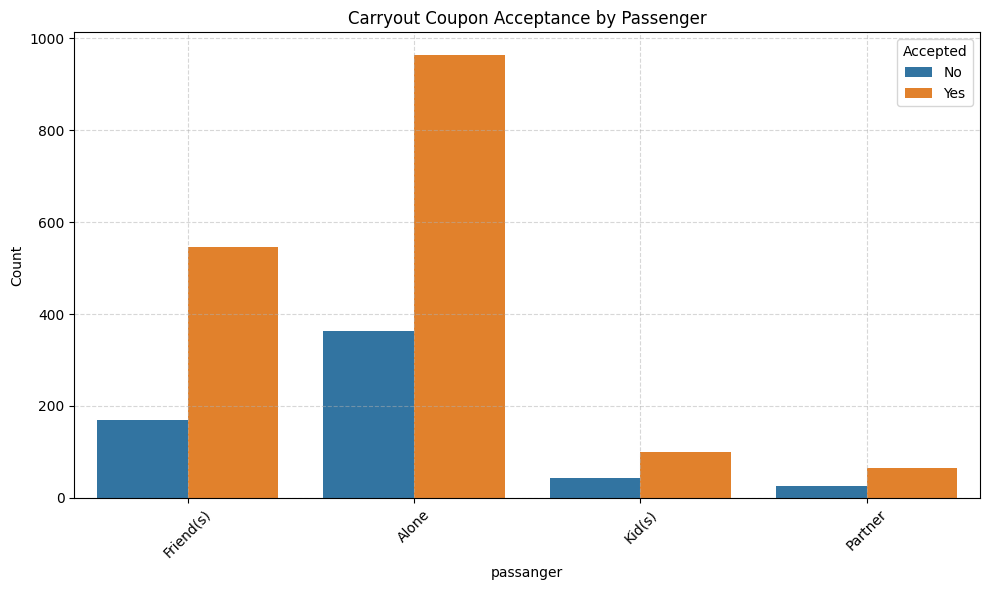

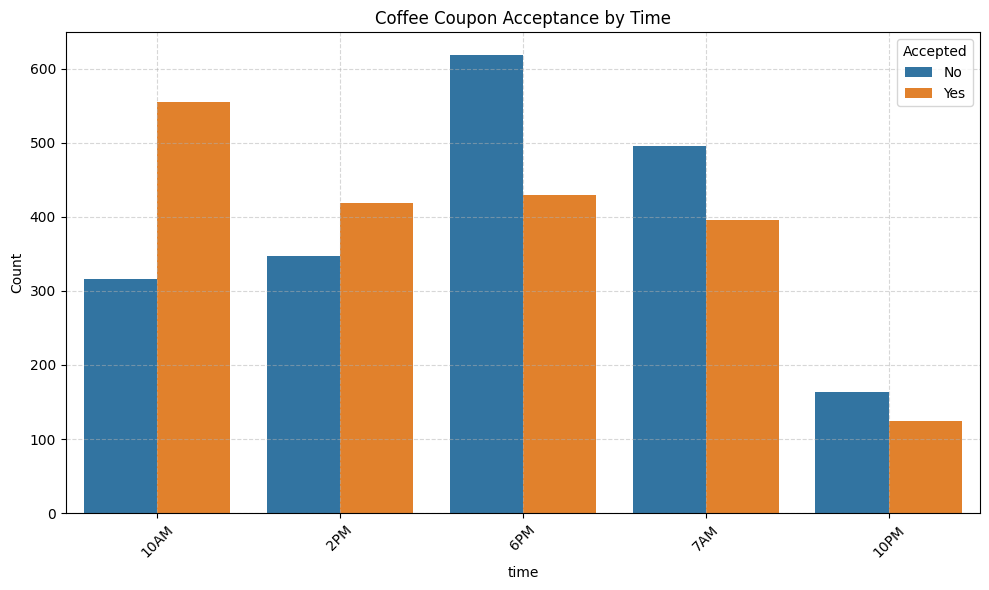

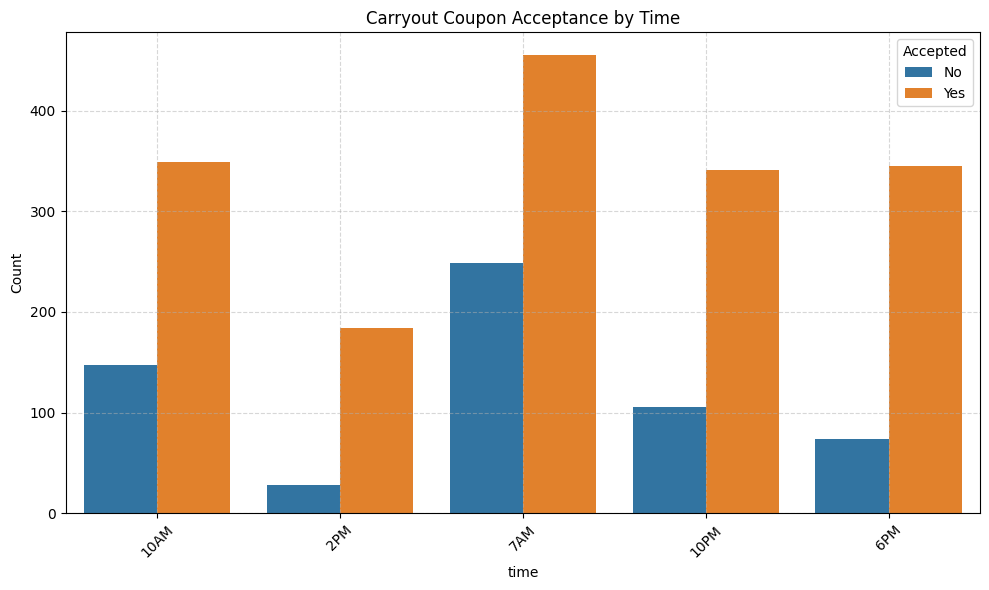

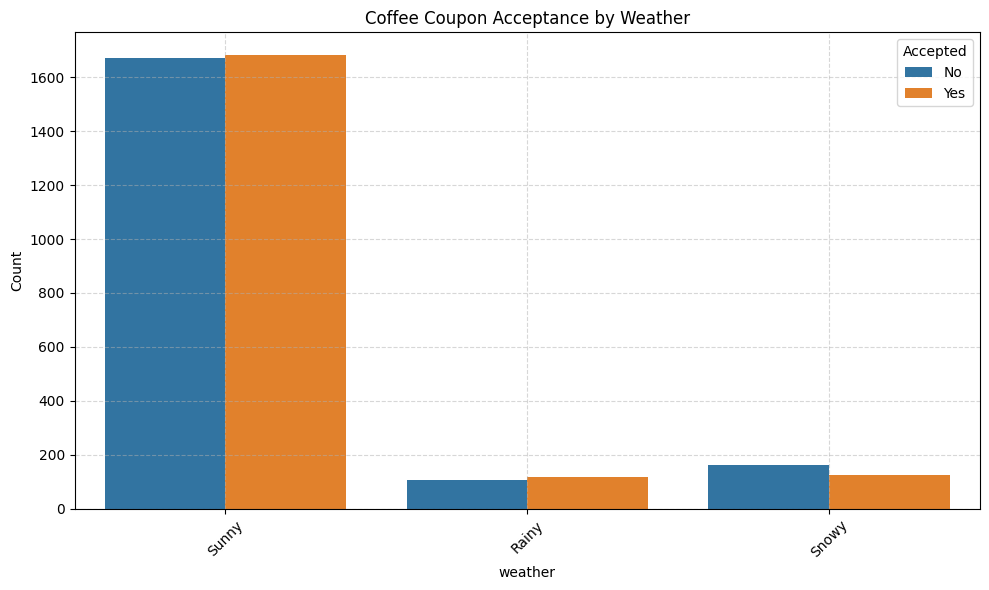

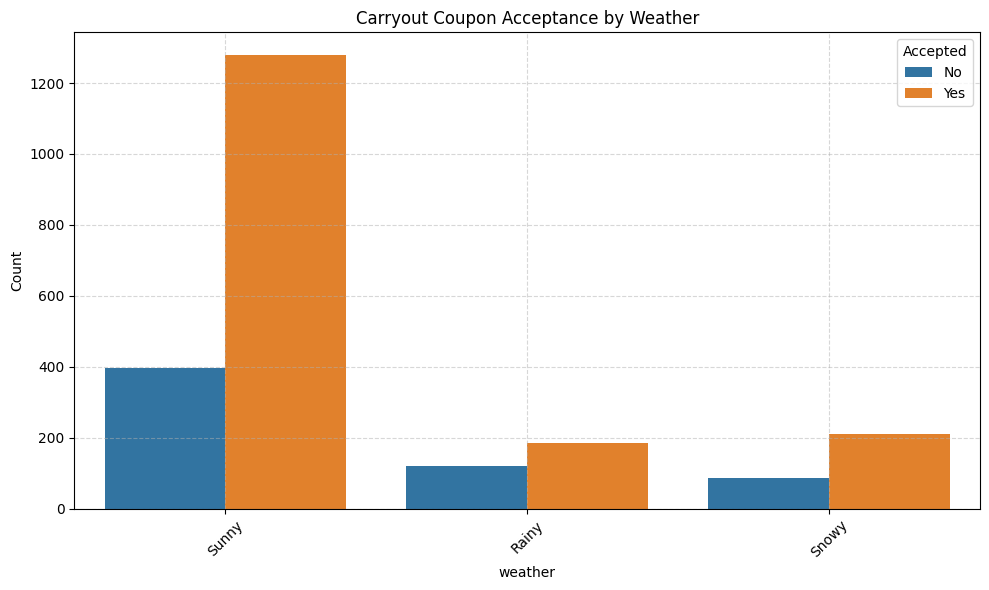

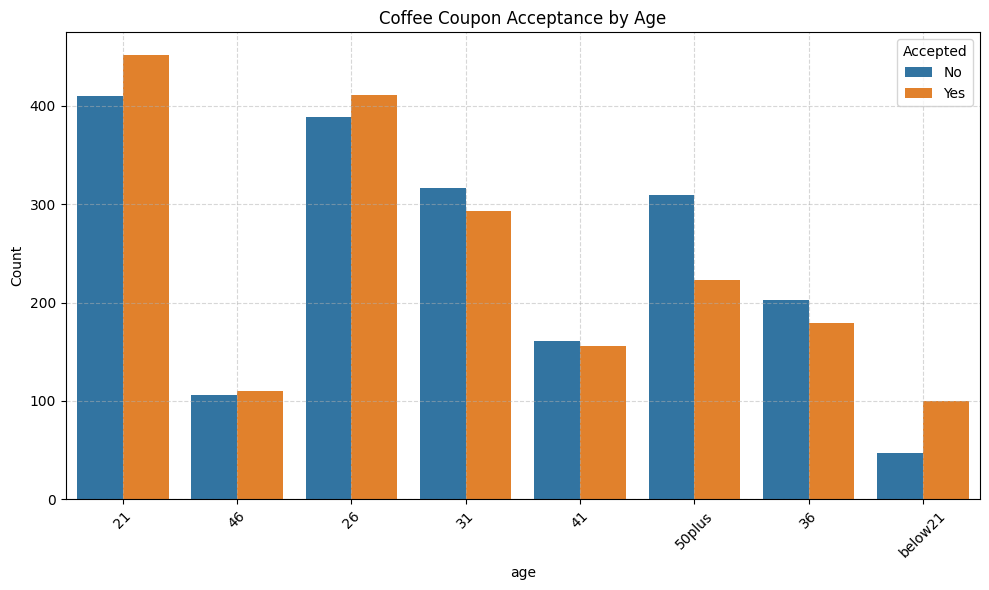

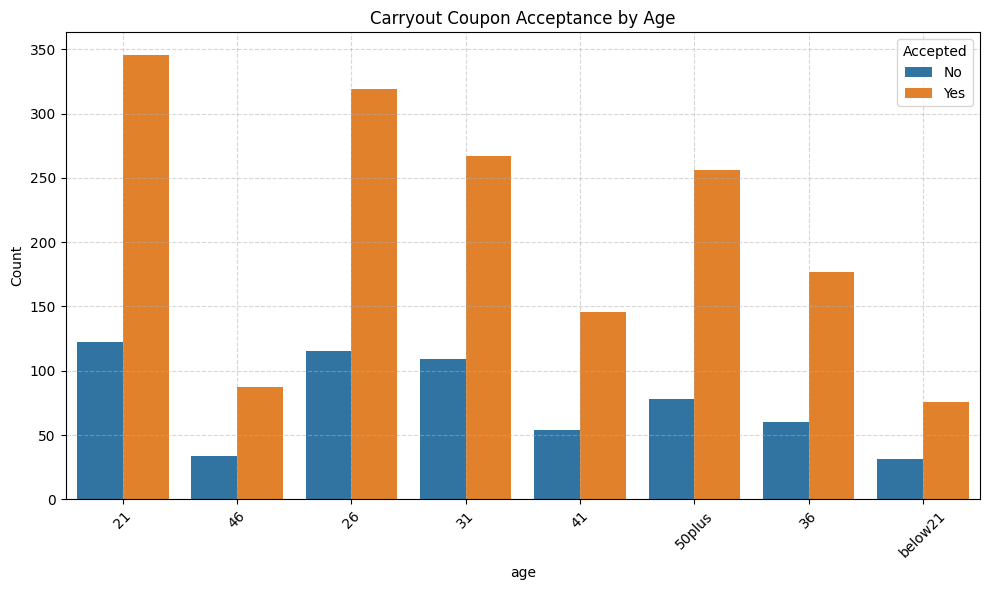

In [152]:
print(cleaned_data['coupon'].unique())

# Standardizing values for consistency
df_cleaned_data_indp = cleaned_data.copy()
df_cleaned_data_indp['CoffeeHouse'] = df_cleaned_data_indp['CoffeeHouse'].str.strip()
df_cleaned_data_indp['CarryAway'] = df_cleaned_data_indp['CarryAway'].str.strip()
df_cleaned_data_indp['coupon'] = df_cleaned_data_indp['coupon'].str.strip()

# Filter datasets for each coupon group
df_coffee_coupons = df_cleaned_data_indp[df_cleaned_data_indp['coupon'] == 'Coffee House'].copy()
df_carryout_coupons = df_cleaned_data_indp[df_cleaned_data_indp['coupon'] == 'Carry out & Take away'].copy()

# Define a function to plot acceptance by category
def plot_acceptance_by_category(df, category, title):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=category, hue='Y')
    plt.title(title)
    plt.xlabel(category)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.legend(title="Accepted", labels=["No", "Yes"])
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Generate plots
scenarios = [
    (df_coffee_coupons, 'passanger', 'Coffee Coupon Acceptance by Passenger'),
    (df_carryout_coupons, 'passanger', 'Carryout Coupon Acceptance by Passenger'),
    (df_coffee_coupons, 'time', 'Coffee Coupon Acceptance by Time'),
    (df_carryout_coupons, 'time', 'Carryout Coupon Acceptance by Time'),
    (df_coffee_coupons, 'weather', 'Coffee Coupon Acceptance by Weather'),
    (df_carryout_coupons, 'weather', 'Carryout Coupon Acceptance by Weather'),
    (df_coffee_coupons, 'age', 'Coffee Coupon Acceptance by Age'),
    (df_carryout_coupons, 'age', 'Carryout Coupon Acceptance by Age'),
]

for df, category, title in scenarios:
    plot_acceptance_by_category(df, category, title)